In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = 'Capstone1_Data'
filepath1 = os.path.join('..', path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..', path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [8]:
# top100cat_df = num_top100_by_category.to_frame(name='Counts').reset_index() - make into dataframe
# df_loglikes = df.sort_values(by=['log_likes'], ascending=False) - sort
# num_top100_by_country = top_video_like['country'].value_counts() - count

#boxplot
# plt.figure(figsize = (10,10))
#sns.boxplot(x = "country", y = 'log_views', data = df)

# sns bar chart
# ax = sns.countplot(y="category", data=GB_df[0:100], palette="Set3")

# GB_df = df[df['country'].isin(['GB'])][['country','video_id','title', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
# GB_df

#histogram
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

In [9]:
df['country'].value_counts() 

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

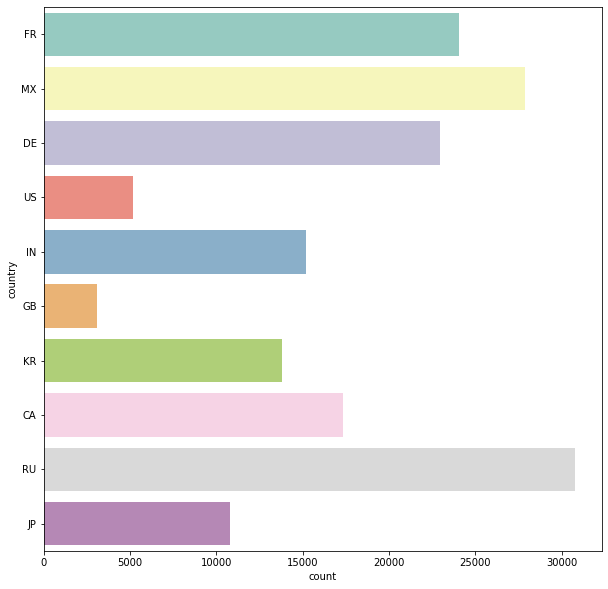

In [10]:
#Top Content producers are RU, MX, FR 
#Number of videos by country
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="country", data=df, palette="Set3")

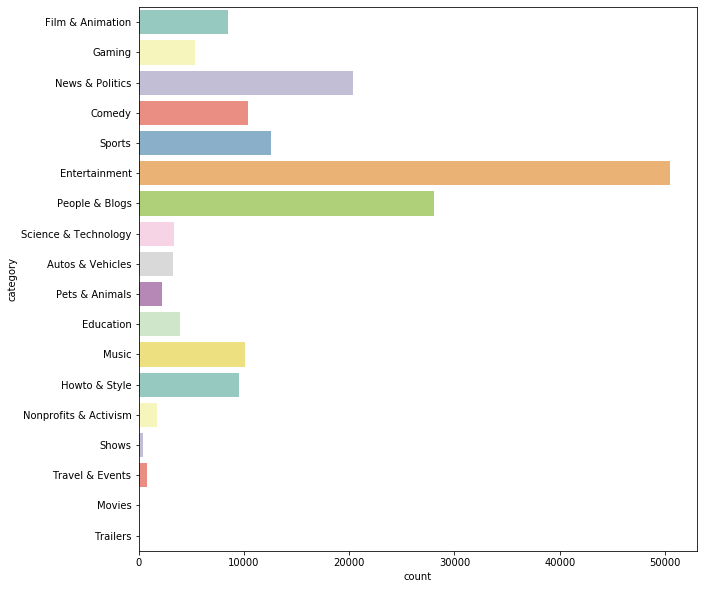

In [11]:
# Top Categories are Entertainment, People & Blogs, News & Politics
# Number of videos by category
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=df, palette="Set3")

In [12]:
GB_df = df[df['country'].isin(['GB'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
GB_df

,country,video_id,trending_date,title,tags,channel_title,category,log_views,log_likes,log_dislikes,log_comment_count
310,US,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",Tati,Howto & Style,14.060310,10.948488,7.672758,10.139626
311,US,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,"madelaine|""madelainepetsch""|""madelaine petsch""...",Madelaine Petsch,People & Blogs,12.542781,9.917883,3.663562,6.845880
312,US,wRGldR_SQAA,2017-11-14,Apple Clips sample,[none],Steve Kovach,People & Blogs,7.723120,0.000000,0.000000,0.000000
313,US,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,"espn|""espn live""|""first take""|""first take espn...",ESPN,Sports,13.060896,8.303505,6.066108,7.348588
314,US,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...","DubNation|""Golden State Warriors""|""Golden Stat...",LetsGoWarriors,Sports,9.699288,4.997212,2.639057,3.871201
...,...,...,...,...,...,...,...,...,...,...,...
170802,CA,VZn6G0M9wNs,2018-06-14,Brain On Fire | Official Trailer [HD] | Netflix,"Netflix|""Trailer""|""Netflix Original Series""|""N...",Netflix,Entertainment,11.549518,8.452761,4.574711,5.746203
170803,CA,HPegJlGLE2I,2018-06-14,LaVar Ball on chances LeBron James joins Lonzo...,"fox|""fox sports""|""fs1""|""fox sports 1""|""undispu...",Skip and Shannon: UNDISPUTED,Sports,14.066997,9.762615,7.431892,8.866300
170804,CA,Q1oGvWctQ1E,2018-06-14,5 Watermelon Gadgets put to the Test,"Watermelon Gadgets|""watermelon slicer""|""Gadget...",CrazyRussianHacker,Science & Technology,13.324002,9.788638,6.400257,7.459915
170805,CA,RwFNYOxCS3s,2018-06-14,Funniest YEARBOOK QUOTES Ever,"azzyland|""azzy""|""reaction""|""reacting""|""funny""|...",AzzyLand,Entertainment,12.476619,9.781489,5.236442,8.323366


In [13]:
GB_cat_counts = GB_df['category'].value_counts()
GB_cat_counts

Entertainment            8019
News & Politics          2919
People & Blogs           2530
Music                    2084
Sports                   2017
Comedy                   1837
Howto & Style            1629
Film & Animation         1225
Gaming                    885
Science & Technology      792
Education                 704
Pets & Animals            313
Autos & Vehicles          302
Travel & Events           233
Nonprofits & Activism      55
Shows                      49
Name: category, dtype: int64

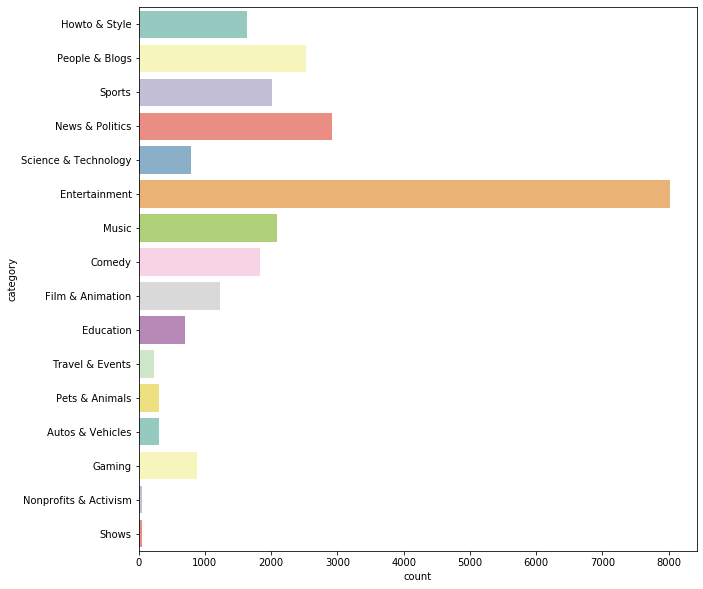

In [14]:
#Most views
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=GB_df, palette="Set3")

In [15]:
# Most views sort videos
GB_df_views = GB_df.sort_values(by=['log_views'], ascending=False)

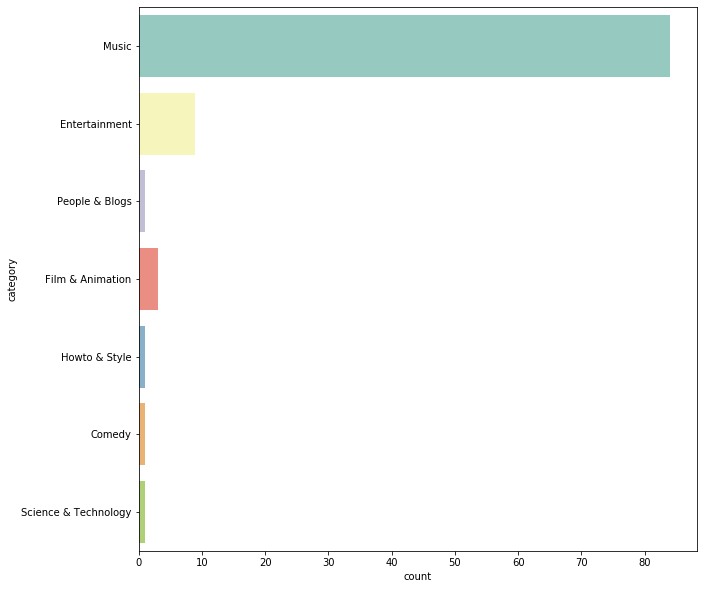

In [16]:
#Top 100 videos by categories 
GBtop100 = GB_df_views[0:100]
GBtop100
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=GBtop100, palette="Set3")

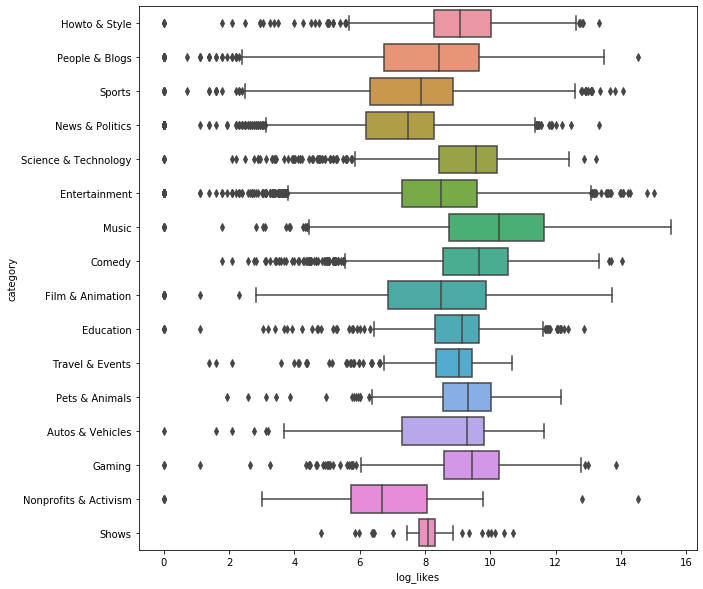

In [17]:
#GB activity - Log Likes by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_likes', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

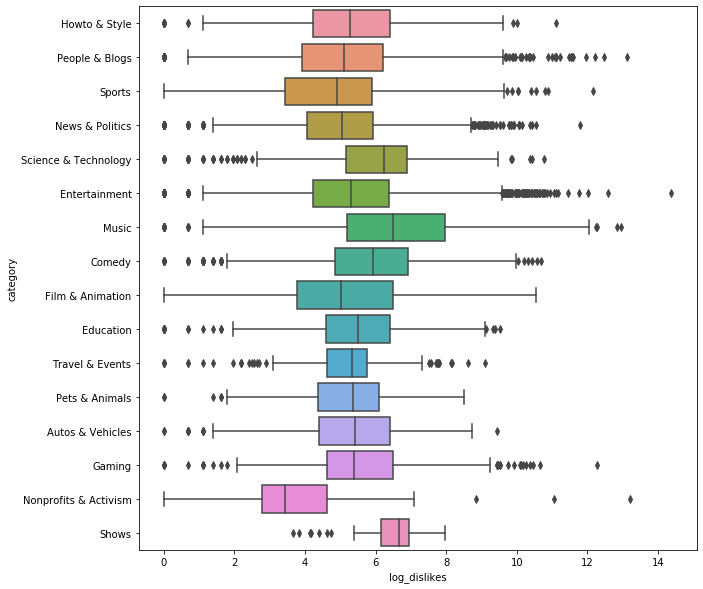

In [18]:
#GB activity - Log Dislikes by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_dislikes', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

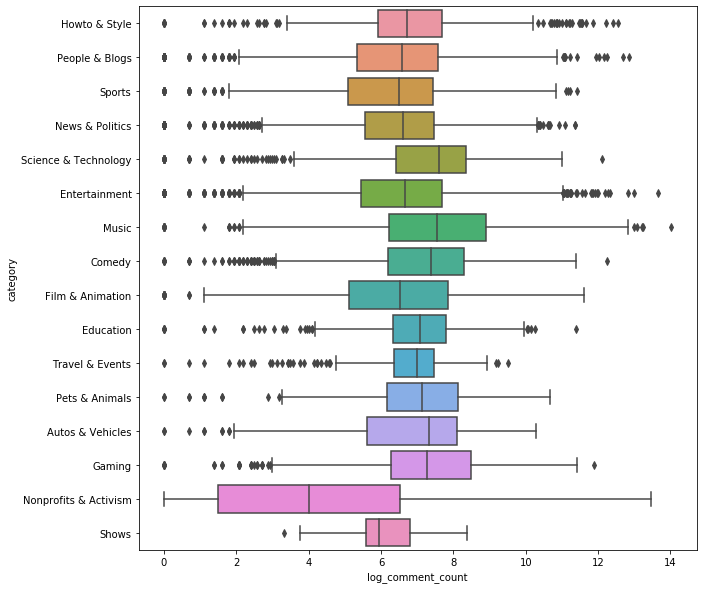

In [19]:
#GB activity - Comment_Counts by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_comment_count', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

In [20]:
GB_channel = GB_df['channel_title'].value_counts()
GB_channel[0:10]

ESPN                                      184
CNN                                       154
MSNBC                                     146
The Young Turks                           144
The Late Show with Stephen Colbert        139
ARY Digital                               135
TheEllenShow                              131
SET India                                 121
The Tonight Show Starring Jimmy Fallon    120
Jimmy Kimmel Live                         118
Name: channel_title, dtype: int64

In [21]:
GB_ent_df = GB_df[GB_df['category'].isin(['Entertainment'])][['video_id','trending_date','title', 'tags', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]

In [22]:
df_dates.head()

NameError: name 'df_dates' is not defined

In [91]:
import pandas as pd
import numpy as np
import datetime
df_dates = df[['video_id', 'trending_date', 'publish_date', 'country', 'log_views']] 
GB_dates = df_dates.loc[df_dates['country'] == 'GB', ['country','trending_date', 'publish_date', 'video_id', 'log_views']]

In [92]:
GB_dates['month'] = pd.DatetimeIndex(GB_dates['publish_date']).month
GB_dates.head()

,country,trending_date,publish_date,video_id,log_views,month
432,GB,2017-11-14,2017-11-13,rHwDegptbI4,9.191769,11
433,GB,2017-11-14,2017-11-11,AumaWl0TNBo,13.983375,11
434,GB,2017-11-14,2017-11-10,-N5eucPMTTc,13.967546,11
436,GB,2017-11-14,2017-11-10,fiusxyygqGk,15.041345,11
466,GB,2017-11-14,2017-11-07,mCx26FLXWuI,14.339874,11


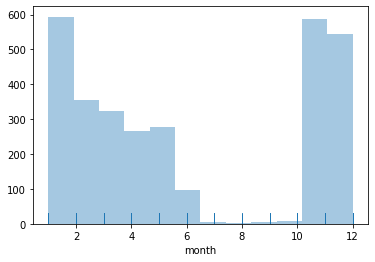

In [99]:
x = GB_dates['month']
sns.distplot(x, bins=12, kde=False, rug=True);

In [85]:
GB_dates_count = GB_dates['month'].value_counts()
GB_dates_count
GB_dates_count_df = GB_dates_count.to_frame(name='Counts').reset_index()
GB_dates_count_df.columns = ['month', 'count']
GB_dates_count_df

,month,count
0,1,594
1,11,588
2,12,545
3,2,355
4,3,323
5,5,279
6,4,266
7,6,98
8,10,9
9,9,5
